In [1]:
#import libararies
import numpy as np
import pandas as pd
#import chardet
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# Code clean-up

In [2]:
#24]:
#Import .csv data (from: https://www.kaggle.com/kemical/kickstarter-projects)
#kickstarters_2016 = pd.read_csv('../data/ks-projects-201612.csv') returns error because of encoding problems

# look at the first ten thousand bytes to guess the character encoding, using cardet
#with open("./data/ks-projects-201612.csv", 'rb') as rawdata:
#    result = chardet.detect(rawdata.read(10000))
    
#Check encoding    
#print(result)

#Cardet guesses with 73% confidence the encoding is Windows-1252

In [3]:
kickstarters_2016 = pd.read_csv('./data/ks-projects-201612.csv', encoding='Windows-1252')
#Encoding seems correct, basic check of data
kickstarters_2016.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


In [4]:
#This import properly works
kickstarters_2018 = pd.read_csv('./data/ks-projects-201801.csv')

In [5]:
#Basic inspection of data #2
kickstarters_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
#Drop columns with NaN
del kickstarters_2016['Unnamed: 13']
del kickstarters_2016['Unnamed: 14']
del kickstarters_2016['Unnamed: 15']
del kickstarters_2016['Unnamed: 16']

In [7]:
kickstarters_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [8]:
#Save file to UTF-8
kickstarters_2016.to_csv('./data/kickstarters_2016.csv', encoding='utf-8', index=False)

In [9]:
#Read the saved file
kickstarter_2016 = pd.read_csv('./data/kickstarters_2016.csv')

In [10]:
#Quick inspection
kickstarter_2016.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [11]:
# Group by states, for an overview
pd.unique(kickstarters_2018.state)

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [12]:
kickstarters_2018.groupby('state')['ID'].count()

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
Name: ID, dtype: int64

In [13]:
# State Aanpassen
state_mapper = {"successful": 1} 

indexState = kickstarters_2018[(kickstarters_2018['state'] == 'live') | (kickstarters_2018['state'] == 'undefined') | (kickstarters_2018['state'] == 'suspended')].index
kickstarters_2018['state'].drop(indexState , inplace=True)
kickstarters_2018['state'] = kickstarters_2018['state'].map(state_mapper)
kickstarters_2018['state'].fillna(0, inplace = True)

kickstarters_2018.state = kickstarters_2018.state.astype(int)

# Data onderzoek

In [14]:
kickstarters_2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00


In [15]:
kickstarters_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null int32
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int32(1), int64(2), object(7)
memory usage: 41.9+ MB


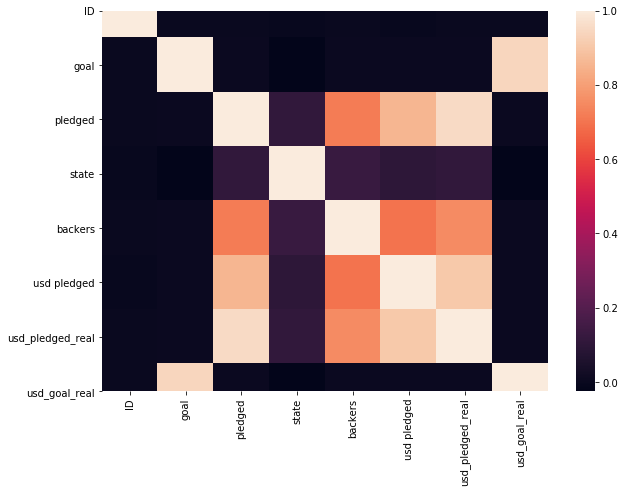

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(kickstarters_2018.corr())
plt.show()

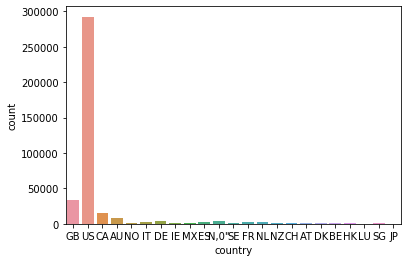

In [17]:
sns.countplot(kickstarters_2018['country'])

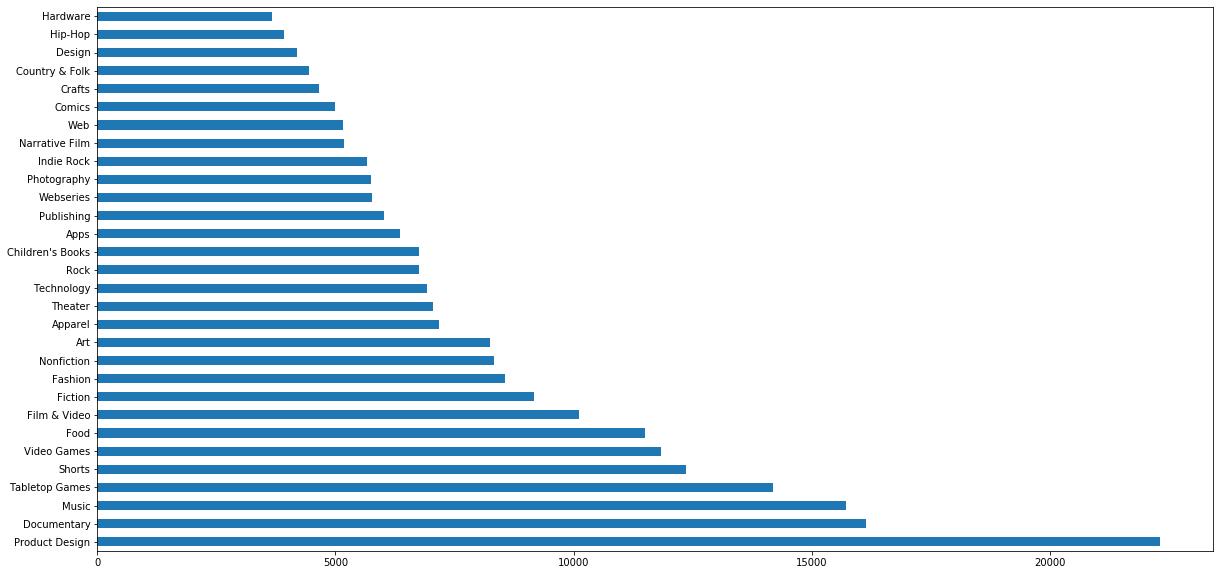

In [18]:
kickstarters_2018['category'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

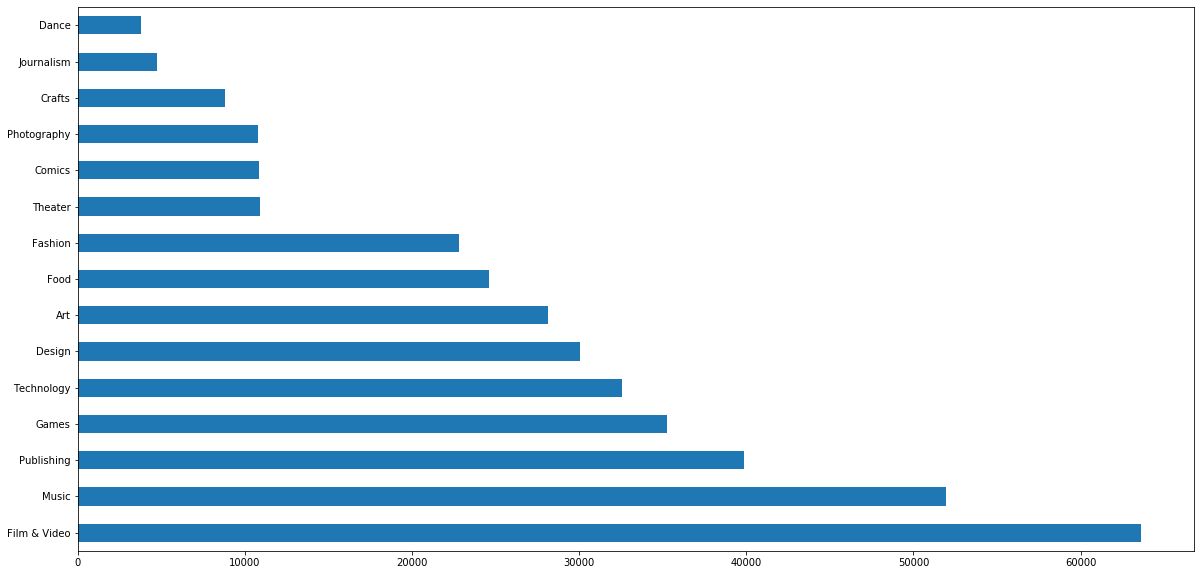

In [19]:
kickstarters_2018['main_category'].value_counts().head(30).plot(kind='barh', figsize=(20,10))

# Machine learning

In [20]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

Using TensorFlow backend.


In [21]:
del kickstarters_2018['name']
del kickstarters_2018['category']
del kickstarters_2018['main_category']
del kickstarters_2018['currency']
del kickstarters_2018['deadline']
del kickstarters_2018['launched']
del kickstarters_2018['country']
del kickstarters_2018['ID']

In [22]:
kickstarters_2018.head()

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
0,1000.0,0.0,0,0,0.0,0.0,1533.95
1,30000.0,2421.0,0,15,100.0,2421.0,30000.00
2,45000.0,220.0,0,3,220.0,220.0,45000.00
3,5000.0,1.0,0,1,1.0,1.0,5000.00
4,19500.0,1283.0,0,14,1283.0,1283.0,19500.00


In [23]:
kickstarters_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 7 columns):
goal                378661 non-null float64
pledged             378661 non-null float64
state               378661 non-null int32
backers             378661 non-null int64
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int32(1), int64(1)
memory usage: 18.8 MB


In [57]:
kickstarters_2018.describe()

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,0.353762,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,0.478137,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,0.000000,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,0.000000,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,1.000000,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,1.000000,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [58]:
## Normalisation

In [59]:
normalized_df=(kickstarters_2018-kickstarters_2018.mean())/kickstarters_2018.std() # MeanNormalization
normalized_df2=(kickstarters_2018-kickstarters_2018.min())/(kickstarters_2018.max()-kickstarters_2018.min()) #minMax Normie

In [60]:
normalized_df.head()

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
0,-0.040630,-0.101248,-0.739876,-0.116423,-0.089481,-0.099578,-0.038094
1,-0.016124,-0.075934,-0.739876,-0.099889,-0.088209,-0.072966,-0.013404
2,-0.003448,-0.098948,-0.739876,-0.113116,-0.086683,-0.097159,-0.000394
3,-0.037250,-0.101238,-0.739876,-0.115321,-0.089468,-0.099567,-0.035088
4,-0.024997,-0.087833,-0.739876,-0.100991,-0.073166,-0.085475,-0.022511


In [91]:
normalized_df2.head()

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
0,0.000010,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000009
1,0.000300,1.190325e-04,0.0,0.000068,4.916666e-06,1.190325e-04,0.000180
2,0.000450,1.081666e-05,0.0,0.000014,1.081666e-05,1.081666e-05,0.000270
3,0.000050,4.916666e-08,0.0,0.000005,4.916666e-08,4.916666e-08,0.000030
4,0.000195,6.308082e-05,0.0,0.000064,6.308082e-05,6.308082e-05,0.000117


In [93]:
normalized_df.dropna()

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
0,-0.040630,-0.101248,-0.739876,-0.116423,-0.089481,-0.099578,-0.038094
1,-0.016124,-0.075934,-0.739876,-0.099889,-0.088209,-0.072966,-0.013404
2,-0.003448,-0.098948,-0.739876,-0.113116,-0.086683,-0.097159,-0.000394
3,-0.037250,-0.101238,-0.739876,-0.115321,-0.089468,-0.099567,-0.035088
4,-0.024997,-0.087833,-0.739876,-0.100991,-0.073166,-0.085475,-0.022511
...,...,...,...,...,...,...,...
378656,0.000777,-0.100987,-0.739876,-0.115321,-0.089163,-0.099303,0.003943
378657,-0.040207,-0.099628,-0.739876,-0.110912,-0.087510,-0.097874,-0.038123
378658,-0.028799,-0.101039,-0.739876,-0.115321,-0.089226,-0.099358,-0.026414
378659,-0.028799,-0.099157,-0.739876,-0.109809,-0.086937,-0.097379,-0.026414


In [94]:
normalized_df2.dropna()

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
0,0.000010,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.000009
1,0.000300,1.190325e-04,0.0,0.000068,4.916666e-06,1.190325e-04,0.000180
2,0.000450,1.081666e-05,0.0,0.000014,1.081666e-05,1.081666e-05,0.000270
3,0.000050,4.916666e-08,0.0,0.000005,4.916666e-08,4.916666e-08,0.000030
4,0.000195,6.308082e-05,0.0,0.000064,6.308082e-05,6.308082e-05,0.000117
...,...,...,...,...,...,...,...
378656,0.000500,1.229166e-06,0.0,0.000005,1.229166e-06,1.229166e-06,0.000301
378657,0.000015,7.620832e-06,0.0,0.000023,7.620832e-06,7.620832e-06,0.000009
378658,0.000150,9.833332e-07,0.0,0.000005,9.833332e-07,9.833332e-07,0.000090
378659,0.000150,9.833332e-06,0.0,0.000027,9.833332e-06,9.833332e-06,0.000090


In [95]:
sc = StandardScaler()
X = sc.fit_transform(normalized_df.drop('state', axis=1))
y = normalized_df['state'].values
y_cat = to_categorical(y)

In [96]:
X.shape

(378661, 6)

In [97]:
y_cat.shape

(378661, 2)

In [98]:
## Training

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat,random_state=22,test_size=0.2)

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers.recurrent import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation

In [111]:
model = Sequential()
model.add(Dense(5, input_shape=(6,), activation='relu')) 
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(Adam(lr=0.0001, clipvalue=0.5),loss='categorical_crossentropy',metrics=['accuracy'])
#from tensorflow.keras.optimizers import SGD
#model.compile(SGD(lr=0.01),loss = "categorical_crossentropy",metrics=['accuracy'])

In [112]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 5)                 35        
_________________________________________________________________
dense_37 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 22        
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_split=0.1, epochs=5)

Train on 272635 samples, validate on 30293 samples
Epoch 1/5
 27936/272635 [==>...........................] - ETA: 15s - loss: nan - accuracy: 0.6452

# Validatie

In [38]:
y_pred = model.predict(X_test)

In [39]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
pd.Series(y_test_class).value_counts() / len(y_test_class)

0    0.646614
1    0.353386
dtype: float64

In [42]:
accuracy_score(y_test_class, y_pred_class)

0.646613761504232

In [43]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79     48970
           1       0.00      0.00      0.00     26763

    accuracy                           0.65     75733
   macro avg       0.32      0.50      0.39     75733
weighted avg       0.42      0.65      0.51     75733



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
confusion_matrix(y_test_class, y_pred_class)

array([[48970,     0],
       [26763,     0]], dtype=int64)